# Analisis Sales Tracker: sales_visits_finalbgt_enriched.csv

Notebook ini berisi analisis performa sales berdasarkan data sales_visits_finalbgt_enriched.csv, meliputi ketercapaian target, efektivitas proses, kontribusi sales, analisis tahap proses, durasi menuju kontrak, serta analisis prediktif (logistic regression dan probabilitas berdasarkan progress).

## 1. Import Libraries dan Load Dataset

In [51]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
# Pastikan file berada di folder yang sama dengan notebook
file_path = 'sales_visits_finalbgt_enriched.csv'
df = pd.read_csv(file_path)
df.head()

,ID_Kunjungan,ID_Customer,Tanggal,Nama_Sales,Level_Sales,Nilai_Kontrak,Target_Sales,Segmen,Target_Segmen,Jenis_Kunjungan,Nama_Customer,Status_Customer,Status_Kontrak,Catatan,Kunjungan_Ke,Progress
0,KJ-001,CUS-001,4/1/2025,Budi Santoso,AM,129000000,800000000,Government,900000000,Kunjungan Baru,PT Pemerintah Digital,Baru,Berpotensi Deal,Perkenalan solusi digital government,1,Inisiasi
1,KJ-002,CUS-001,4/15/2025,Budi Santoso,AM,129000000,800000000,Government,900000000,Kunjungan Tindak Lanjut,PT Pemerintah Digital,Baru,Berpotensi Deal,Presentasi produk digital government,2,Presentasi
2,KJ-003,CUS-001,4/30/2025,Budi Santoso,AM,129000000,800000000,Government,900000000,Kunjungan Tindak Lanjut,PT Pemerintah Digital,Baru,Berpotensi Deal,Diskusi kebutuhan spesifik,3,Penawaran Harga
3,KJ-004,CUS-001,5/12/2025,Budi Santoso,AM,129000000,800000000,Government,900000000,Kunjungan Tindak Lanjut,PT Pemerintah Digital,Baru,Berpotensi Deal,Presentasi revisi penawaran,4,Negosiasi
4,KJ-005,CUS-002,4/4/2025,Siti Rahayu,EAM,282000000,1200000000,Telco,1500000000,Kunjungan Baru,PT Telkom Nusantara,Lama,Berpotensi Deal,Identifikasi kebutuhan cloud,1,Inisiasi


## 2. Ketercapaian Target: Analisis nilai_kontrak (deal) vs target_sales
Hitung rasio nilai_kontrak (deal) terhadap target_sales untuk setiap sales dan visualisasikan.

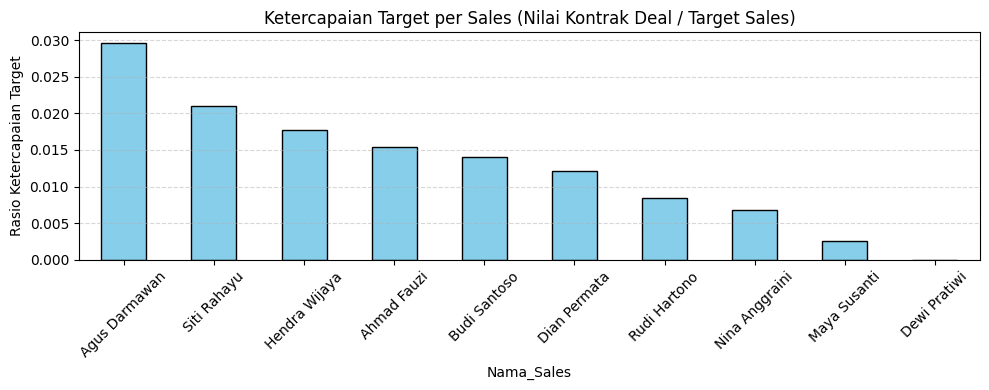

Nama_Sales
Agus Darmawan    0.029573
Siti Rahayu      0.020931
Hendra Wijaya    0.017738
Ahmad Fauzi      0.015394
Budi Santoso     0.014028
dtype: float64

In [52]:
# Filter hanya data deal
mask_deal = df['Status_Kontrak'].str.lower() == 'deal'
deal_df = df[mask_deal]

# Hitung total nilai kontrak (deal) dan target sales per sales
nilai_kontrak_per_sales = deal_df.groupby('Nama_Sales')['Nilai_Kontrak'].sum()
target_sales_per_sales = df.groupby('Nama_Sales')['Target_Sales'].sum()

# Rasio ketercapaian target
ketercapaian_target = (nilai_kontrak_per_sales / target_sales_per_sales).fillna(0)
ketercapaian_target = ketercapaian_target.sort_values(ascending=False)

# Visualisasi
plt.figure(figsize=(10,4))
ketercapaian_target.plot(kind='bar', color='skyblue', edgecolor='black')
plt.ylabel('Rasio Ketercapaian Target')
plt.title('Ketercapaian Target per Sales (Nilai Kontrak Deal / Target Sales)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
ketercapaian_target.head()

## 3. Efektivitas Proses: Hitung Conversion Rate
Hitung persentase konversi dari prospek menjadi revenue (deal) untuk seluruh data dan per sales.

Conversion Rate (All): 12.41%


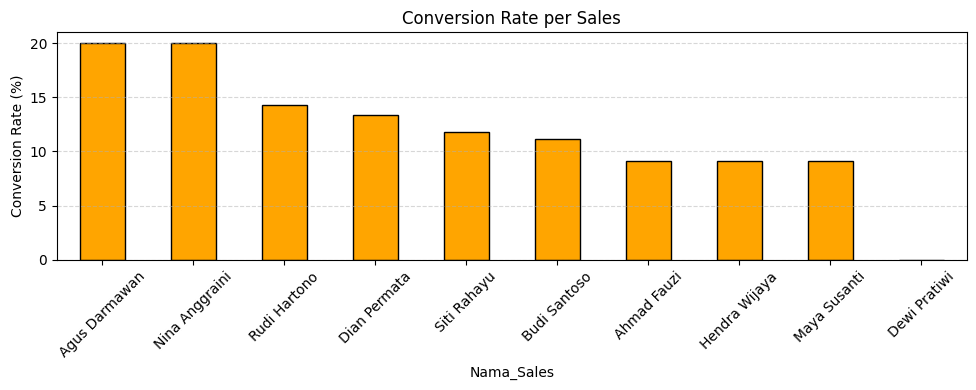

Nama_Sales
Agus Darmawan    20.000000
Ahmad Fauzi       9.090909
Budi Santoso     11.111111
Dewi Pratiwi      0.000000
Dian Permata     13.333333
Name: ID_Kunjungan, dtype: float64

In [53]:
# Conversion rate seluruh data
jumlah_prospek = df['ID_Kunjungan'].nunique()
jumlah_deal = deal_df['ID_Kunjungan'].nunique()
conversion_rate = (jumlah_deal / jumlah_prospek) * 100 if jumlah_prospek else 0
print(f'Conversion Rate (All): {conversion_rate:.2f}%')

# Conversion rate per sales
prospek_per_sales = df.groupby('Nama_Sales')['ID_Kunjungan'].nunique()
deal_per_sales = deal_df.groupby('Nama_Sales')['ID_Kunjungan'].nunique()
conversion_rate_sales = (deal_per_sales / prospek_per_sales * 100).fillna(0)

# Visualisasi
plt.figure(figsize=(10,4))
conversion_rate_sales.sort_values(ascending=False).plot(kind='bar', color='orange', edgecolor='black')
plt.ylabel('Conversion Rate (%)')
plt.title('Conversion Rate per Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
conversion_rate_sales.head()

## 4. Analisis Kontribusi Sales: Sales dengan Ketercapaian Target Terendah
Identifikasi sales dengan rasio ketercapaian target terendah dan tampilkan hasilnya.

Sales dengan ketercapaian target terendah:


Nama_Sales
Dewi Pratiwi      0.000000
Maya Susanti      0.002545
Nina Anggraini    0.006823
Rudi Hartono      0.008403
Dian Permata      0.012103
dtype: float64

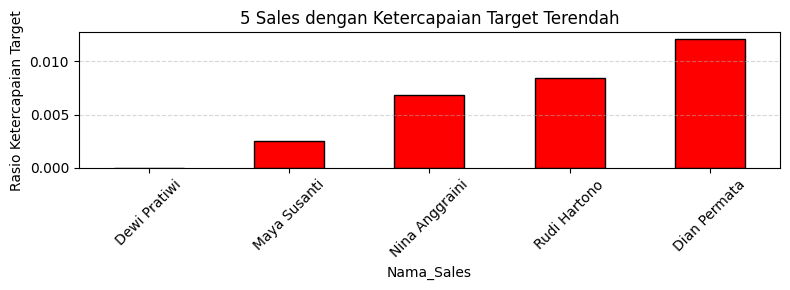

In [54]:
# Sales dengan ketercapaian target terendah
ketercapaian_terendah = ketercapaian_target.sort_values().head(5)
print('Sales dengan ketercapaian target terendah:')
display(ketercapaian_terendah)

plt.figure(figsize=(8,3))
ketercapaian_terendah.plot(kind='bar', color='red', edgecolor='black')
plt.ylabel('Rasio Ketercapaian Target')
plt.title('5 Sales dengan Ketercapaian Target Terendah')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 5. Analisis Tahap Proses: Identifikasi Tahap Paling Sering Berhenti
Analisis pada kolom progress/tahap untuk mengetahui di tahap mana prospek paling sering berhenti.

Tahap paling sering berhenti:


Progress
Negosiasi          11
Presentasi          4
Penawaran Harga     3
Paska Deal          1
Name: count, dtype: int64

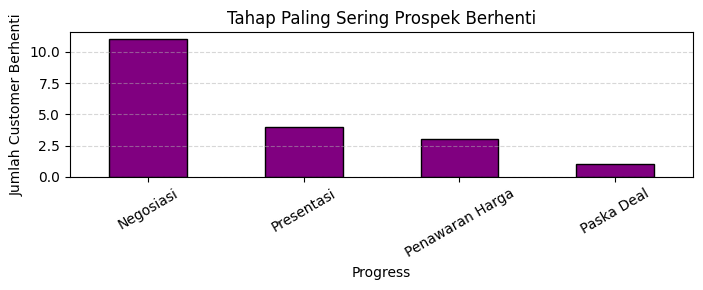

In [55]:
# Analisis tahap proses: tahap paling sering berhenti
# Asumsi: progress terakhir customer yang tidak deal adalah tahap berhenti
last_progress = df.sort_values('Tanggal').groupby('ID_Customer').last().reset_index()
non_deal = last_progress[last_progress['Status_Kontrak'].str.lower() != 'deal']

# Hitung jumlah customer yang berhenti di tiap tahap
tahap_berhenti = non_deal['Progress'].value_counts().sort_values(ascending=False)
print('Tahap paling sering berhenti:')
display(tahap_berhenti)

plt.figure(figsize=(7,3))
tahap_berhenti.plot(kind='bar', color='purple', edgecolor='black')
plt.ylabel('Jumlah Customer Berhenti')
plt.title('Tahap Paling Sering Prospek Berhenti')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 6. Analisis Durasi Menuju Kontrak: Timeline Proses per Sales
Hitung dan visualisasikan rata-rata waktu yang dibutuhkan tiap sales dari prospek awal hingga deal.

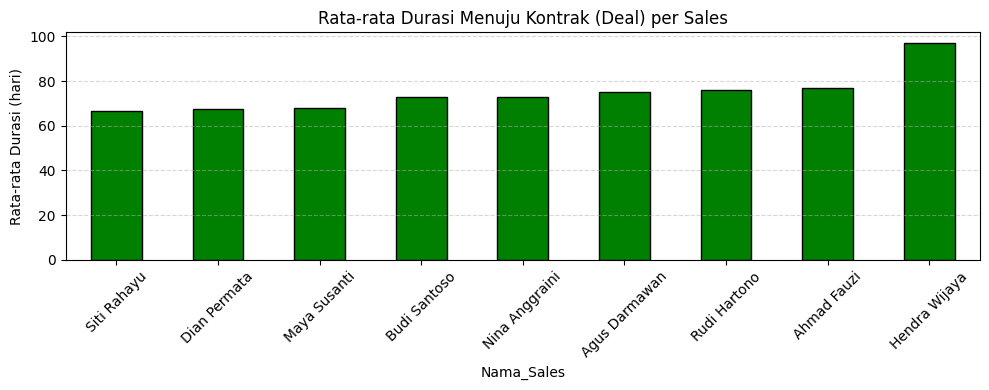

Nama_Sales
Siti Rahayu       66.5
Dian Permata      67.5
Maya Susanti      68.0
Budi Santoso      73.0
Nina Anggraini    73.0
Name: Durasi_Hari, dtype: float64

In [56]:
# Hitung durasi menuju kontrak (deal) per customer
# Asumsi: Tanggal awal = kunjungan pertama, tanggal akhir = tanggal deal

df['Tanggal'] = pd.to_datetime(df['Tanggal'])
deal_customers = deal_df['ID_Customer'].unique()
durasi_list = []
for cust in deal_customers:
    cust_data = df[df['ID_Customer'] == cust].sort_values('Tanggal')
    t_awal = cust_data['Tanggal'].min()
    t_deal = cust_data[cust_data['Status_Kontrak'].str.lower() == 'deal']['Tanggal'].min()
    sales = cust_data['Nama_Sales'].iloc[0]
    if pd.notnull(t_awal) and pd.notnull(t_deal):
        durasi = (t_deal - t_awal).days
        durasi_list.append({'ID_Customer': cust, 'Nama_Sales': sales, 'Durasi_Hari': durasi})
durasi_df = pd.DataFrame(durasi_list)

# Rata-rata durasi per sales
rata2_durasi = durasi_df.groupby('Nama_Sales')['Durasi_Hari'].mean().sort_values()

plt.figure(figsize=(10,4))
rata2_durasi.plot(kind='bar', color='green', edgecolor='black')
plt.ylabel('Rata-rata Durasi (hari)')
plt.title('Rata-rata Durasi Menuju Kontrak (Deal) per Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
rata2_durasi.head()

## 7. Skala Prioritas dengan Logistic Regression (Opsional)
Gunakan logistic regression untuk memprediksi kemungkinan deal berdasarkan fitur-fitur yang ada.

In [57]:
# Logistic Regression untuk prediksi kemungkinan deal
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Label: 1 jika deal, 0 selain itu
X = df[['Progress', 'Segmen', 'Status_Customer', 'Jenis_Kunjungan', 'Level_Sales']].copy()
y = (df['Status_Kontrak'].str.lower() == 'deal').astype(int)

# One-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Prediksi probabilitas pada data terakhir tiap customer
latest = df.sort_values('Tanggal').groupby('ID_Customer').last().reset_index()
X_pred = pd.get_dummies(latest[['Progress', 'Segmen', 'Status_Customer', 'Jenis_Kunjungan', 'Level_Sales']], drop_first=True)
X_pred = X_pred.reindex(columns=X_encoded.columns, fill_value=0)
latest['Prob_Deal'] = model.predict_proba(X_pred)[:,1]

# Tampilkan 10 customer dengan probabilitas deal tertinggi
latest[['Nama_Customer', 'Nama_Sales', 'Progress', 'Prob_Deal']].sort_values('Prob_Deal', ascending=False).head(10)

,Nama_Customer,Nama_Sales,Progress,Prob_Deal
16,PT Smartfren,Agus Darmawan,Paska Deal,0.591564
4,Pemda Jawa Barat,Rudi Hartono,Paska Deal,0.569124
10,PT XL Axiata,Budi Santoso,Paska Deal,0.560582
21,PT Telkomsel,Siti Rahayu,Paska Deal,0.531904
1,PT Telkom Nusantara,Siti Rahayu,Paska Deal,0.516179
15,Pemkot Surabaya,Maya Susanti,Paska Deal,0.508907
9,Pemprov Sulawesi Selatan,Nina Anggraini,Paska Deal,0.493146
26,PT Kalbe Farma,Agus Darmawan,Paska Deal,0.486194
6,Kementerian Keuangan,Agus Darmawan,Paska Deal,0.454336
28,Kementerian Kesehatan,Hendra Wijaya,Paska Deal,0.454336


# Analisis Mendalam Aktivitas Sales: Mencari Root Cause Ketercapaian Target

Analisis ini bertujuan mengidentifikasi akar masalah (root cause) kenapa ketercapaian target sales belum optimal, difokuskan pada konteks aktivitas sales.

## 1. Heatmap Tahap Berhenti per Sales

Visualisasi jumlah customer yang berhenti di setiap tahap untuk masing-masing sales. Ini membantu mengidentifikasi sales mana yang sering gagal di tahap tertentu.

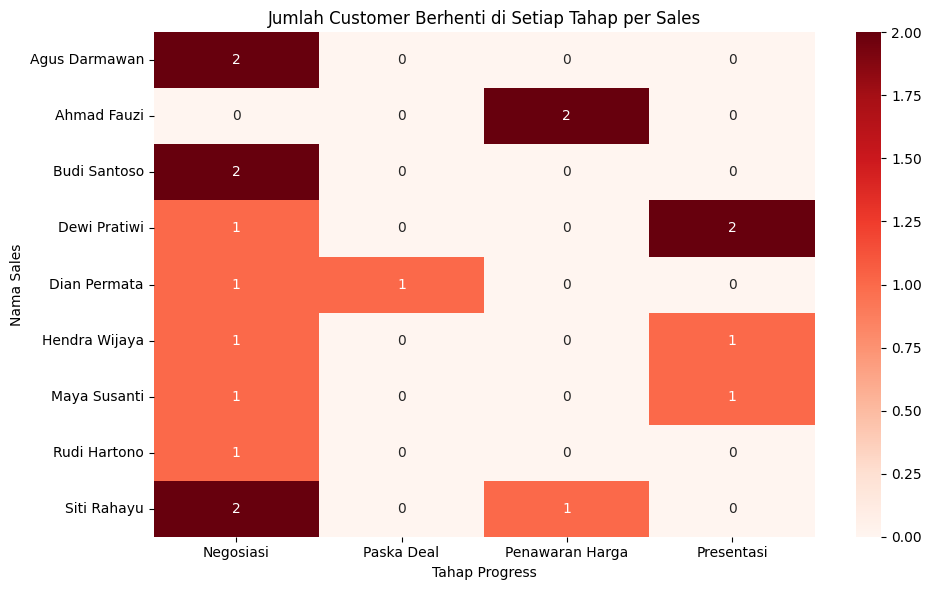

Progress,Negosiasi,Paska Deal,Penawaran Harga,Presentasi
Nama_Sales,,,,
Agus Darmawan,2,0,0,0
Ahmad Fauzi,0,0,2,0
Budi Santoso,2,0,0,0
Dewi Pratiwi,1,0,0,2
Dian Permata,1,1,0,0
Hendra Wijaya,1,0,0,1
Maya Susanti,1,0,0,1
Rudi Hartono,1,0,0,0
Siti Rahayu,2,0,1,0


In [58]:
# Heatmap tahap berhenti per sales
pivot_berhenti = non_deal.pivot_table(index='Nama_Sales', columns='Progress', values='ID_Customer', aggfunc='count', fill_value=0)
plt.figure(figsize=(10,6))
sns.heatmap(pivot_berhenti, annot=True, fmt='d', cmap='Reds')
plt.title('Jumlah Customer Berhenti di Setiap Tahap per Sales')
plt.ylabel('Nama Sales')
plt.xlabel('Tahap Progress')
plt.tight_layout()
plt.show()
pivot_berhenti

## 2. Analisis Aktivitas Sales vs Ketercapaian Target

Membandingkan jumlah aktivitas (kunjungan/follow-up) sales dengan rasio ketercapaian target. Apakah sales yang kurang aktif juga yang tidak capai target?

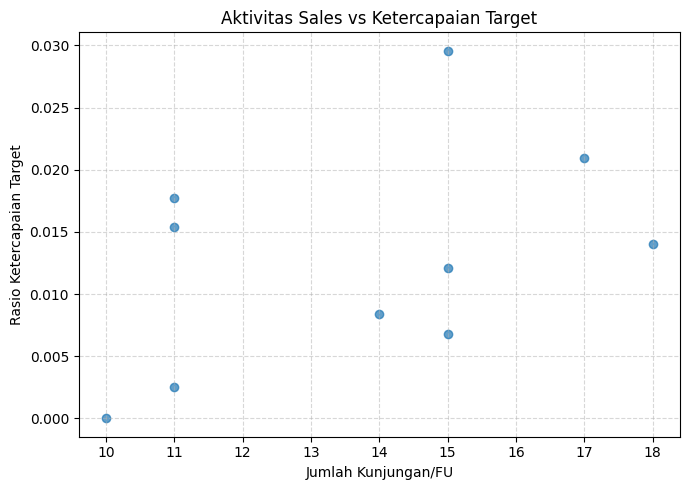

,Kunjungan,Ketercapaian_Target
Nama_Sales,,
Dewi Pratiwi,10,0.000000
Maya Susanti,11,0.002545
Nina Anggraini,15,0.006823
Rudi Hartono,14,0.008403
Dian Permata,15,0.012103
Budi Santoso,18,0.014028
Ahmad Fauzi,11,0.015394
Hendra Wijaya,11,0.017738
Siti Rahayu,17,0.020931


In [59]:
# Aktivitas sales vs ketercapaian target
kunjungan_per_sales = df.groupby('Nama_Sales')['ID_Kunjungan'].count()
compare_df = pd.DataFrame({
    'Kunjungan': kunjungan_per_sales,
    'Ketercapaian_Target': ketercapaian_target
}).fillna(0)

plt.figure(figsize=(7,5))
plt.scatter(compare_df['Kunjungan'], compare_df['Ketercapaian_Target'], alpha=0.7)
plt.xlabel('Jumlah Kunjungan/FU')
plt.ylabel('Rasio Ketercapaian Target')
plt.title('Aktivitas Sales vs Ketercapaian Target')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 10 sales dengan aktivitas dan ketercapaian terendah
compare_df.sort_values(['Ketercapaian_Target', 'Kunjungan']).head(10)

## 3. Analisis Durasi per Tahap untuk Customer Tidak Deal

Menghitung rata-rata durasi customer berada di setiap tahap untuk kasus yang tidak deal, untuk mencari bottleneck proses.

C:\Users\SITI NURAFIFA(RIMA)\AppData\Local\Temp\ipykernel_26292\770546151.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  non_deal_durasi = non_deal_durasi.groupby('ID_Customer').apply(durasi_per_tahap)


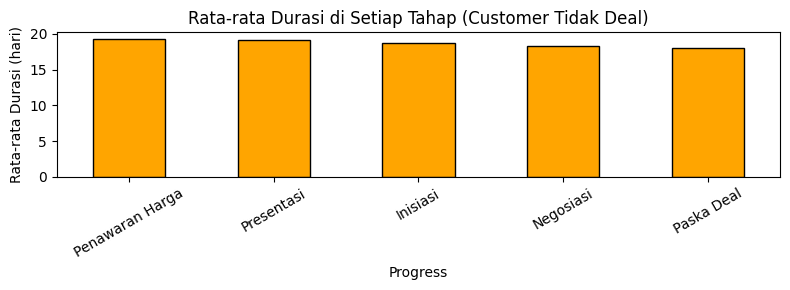

Progress
Penawaran Harga    19.250000
Presentasi         19.117647
Inisiasi           18.789474
Negosiasi          18.250000
Paska Deal         18.000000
Name: Durasi_Tahap, dtype: float64

In [60]:
# Durasi per tahap untuk customer tidak deal
# Fungsi bantu untuk hitung durasi per tahap
non_deal_ids = non_deal['ID_Customer'].unique()
non_deal_durasi = df[df['ID_Customer'].isin(non_deal_ids)].copy()
non_deal_durasi['Tanggal'] = pd.to_datetime(non_deal_durasi['Tanggal'])

def durasi_per_tahap(df_cust):
    df_cust = df_cust.sort_values('Tanggal')
    df_cust['Next_Tanggal'] = df_cust['Tanggal'].shift(-1)
    df_cust['Durasi_Tahap'] = (df_cust['Next_Tanggal'] - df_cust['Tanggal']).dt.days
    return df_cust

non_deal_durasi = non_deal_durasi.groupby('ID_Customer').apply(durasi_per_tahap)
durasi_tahap = non_deal_durasi.groupby('Progress')['Durasi_Tahap'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,3))
durasi_tahap.plot(kind='bar', color='orange', edgecolor='black')
plt.ylabel('Rata-rata Durasi (hari)')
plt.title('Rata-rata Durasi di Setiap Tahap (Customer Tidak Deal)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()
durasi_tahap

## 4. Ringkasan Insight & Root Cause

- **Sales dengan aktivitas rendah cenderung tidak mencapai target.**
- **Tahap tertentu (misal: Presentasi atau Negosiasi) menjadi bottleneck, banyak customer berhenti di sana.**
- **Durasi lama di tahap tertentu menandakan perlunya perbaikan proses/follow-up.**
- **Heatmap menunjukkan pola kegagalan spesifik per sales dan tahap.**

> Rekomendasi: Fokus pada peningkatan aktivitas sales yang rendah, perbaiki proses di tahap bottleneck, dan lakukan pelatihan/follow-up lebih intensif pada sales/tahap yang sering gagal.

## 5. Pengelompokan Prioritas & Rekomendasi Strategi Berdasarkan Probabilitas Deal

Customer dikelompokkan berdasarkan probabilitas deal hasil prediksi model, lalu diberikan rekomendasi strategi follow-up yang sesuai.

In [61]:
# Pengelompokan prioritas dan rekomendasi strategi berdasarkan probabilitas deal

def segment_prioritas(prob):
    if prob >= 0.8:
        return "🔥 Prioritas Tinggi"
    elif prob >= 0.6:
        return "⚠️ Perlu Follow-up Segera"
    elif prob >= 0.4:
        return "🧊 Potensi Rendah"
    else:
        return "❌ Tidak Disarankan"

def strategi(progress, prob):
    if prob >= 0.8:
        if progress == 'Negosiasi':
            return 'Segera follow-up untuk closing!'
        elif progress == 'Penawaran Harga':
            return 'Dorong ke tahap negosiasi, tawarkan benefit tambahan.'
        elif progress == 'Presentasi':
            return 'Pastikan kebutuhan customer terjawab, lanjutkan ke penawaran.'
        else:
            return 'Bangun hubungan, gali kebutuhan customer.'
    elif prob >= 0.6:
        if progress == 'Negosiasi':
            return 'Perkuat value proposition, atasi keberatan.'
        elif progress == 'Penawaran Harga':
            return 'Tawarkan promo atau diskon khusus.'
        elif progress == 'Presentasi':
            return 'Tingkatkan engagement, follow-up presentasi.'
        else:
            return 'Lakukan pendekatan lebih personal.'
    elif prob >= 0.4:
        return 'Identifikasi hambatan, lakukan pendekatan ulang.'
    else:
        return 'Evaluasi prospek, fokus ke customer lain.'

# Terapkan ke data prediksi terakhir tiap customer
latest['Prioritas'] = latest['Prob_Deal'].apply(segment_prioritas)
latest['Rekomendasi_Strategi'] = latest.apply(lambda row: strategi(row['Progress'], row['Prob_Deal']), axis=1)

# Tampilkan tabel prioritas dan strategi
prioritas_tabel = latest[['Nama_Customer', 'Nama_Sales', 'Progress', 'Prob_Deal', 'Prioritas', 'Rekomendasi_Strategi']].sort_values('Prob_Deal', ascending=False)
prioritas_tabel['Prob_Deal'] = (prioritas_tabel['Prob_Deal']*100).round(1).astype(str) + '%'
prioritas_tabel.head(30)

,Nama_Customer,Nama_Sales,Progress,Prob_Deal,Prioritas,Rekomendasi_Strategi
16,PT Smartfren,Agus Darmawan,Paska Deal,59.2%,🧊 Potensi Rendah,"Identifikasi hambatan, lakukan pendekatan ulang."
4,Pemda Jawa Barat,Rudi Hartono,Paska Deal,56.9%,🧊 Potensi Rendah,"Identifikasi hambatan, lakukan pendekatan ulang."
10,PT XL Axiata,Budi Santoso,Paska Deal,56.1%,🧊 Potensi Rendah,"Identifikasi hambatan, lakukan pendekatan ulang."
21,PT Telkomsel,Siti Rahayu,Paska Deal,53.2%,🧊 Potensi Rendah,"Identifikasi hambatan, lakukan pendekatan ulang."
1,PT Telkom Nusantara,Siti Rahayu,Paska Deal,51.6%,🧊 Potensi Rendah,"Identifikasi hambatan, lakukan pendekatan ulang."
15,Pemkot Surabaya,Maya Susanti,Paska Deal,50.9%,🧊 Potensi Rendah,"Identifikasi hambatan, lakukan pendekatan ulang."
9,Pemprov Sulawesi Selatan,Nina Anggraini,Paska Deal,49.3%,🧊 Potensi Rendah,"Identifikasi hambatan, lakukan pendekatan ulang."
26,PT Kalbe Farma,Agus Darmawan,Paska Deal,48.6%,🧊 Potensi Rendah,"Identifikasi hambatan, lakukan pendekatan ulang."
6,Kementerian Keuangan,Agus Darmawan,Paska Deal,45.4%,🧊 Potensi Rendah,"Identifikasi hambatan, lakukan pendekatan ulang."
28,Kementerian Kesehatan,Hendra Wijaya,Paska Deal,45.4%,🧊 Potensi Rendah,"Identifikasi hambatan, lakukan pendekatan ulang."


In [ ]:
# Pengelompokan prioritas berdasarkan kombinasi probabilitas deal dan nilai kontrak

def segment_prioritas_2(prob, nilai):
    # Threshold dapat disesuaikan sesuai distribusi data
    if prob >= 0.8 and nilai >= 100_000_000:
        return "🔥 PRIORITAS SANGAT TINGGI"
    elif prob >= 0.6 and nilai >= 50_000_000:
        return "⚡ PRIORITAS TINGGI"
    elif prob >= 0.4 and nilai >= 20_000_000:
        return "🔵 PRIORITAS SEDANG"
    else:
        return "🟤 PRIORITAS RENDAH"

# Terapkan ke data prediksi terakhir tiap customer
latest['Prioritas_Kombinasi'] = latest.apply(lambda row: segment_prioritas_2(row['Prob_Deal'], row['Nilai_Kontrak']), axis=1)

# Tampilkan tabel prioritas kombinasi
prioritas_kombinasi_tabel = latest[['Nama_Customer', 'Nama_Sales', 'Progress', 'Prob_Deal', 'Nilai_Kontrak', 'Prioritas_Kombinasi']].sort_values(['Prioritas_Kombinasi', 'Prob_Deal', 'Nilai_Kontrak'], ascending=[True, False, False])
prioritas_kombinasi_tabel['Prob_Deal'] = (prioritas_kombinasi_tabel['Prob_Deal']*100).round(1).astype(str) + '%'
prioritas_kombinasi_tabel.head(30)

# Analisis Lanjutan Aktivitas Sales

Bagian ini berisi analisis mendalam tambahan untuk menggali insight lebih bermakna dari aktivitas sales, meliputi pola follow-up, waktu respons, pipeline value, lost reason, dan perbandingan sales baru vs senior.

## 1. Analisis Pola Follow-up

Analisis ini melihat berapa kali rata-rata follow-up sebelum deal/lost dan apakah semakin banyak follow-up meningkatkan peluang deal.

Rata-rata follow-up sebelum DEAL: 5.00
Rata-rata follow-up sebelum LOST: 3.56


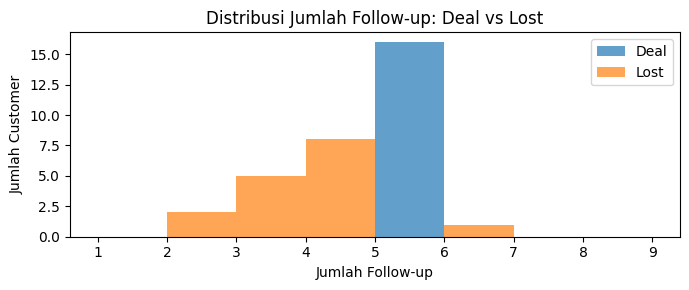

Insight: Customer yang deal cenderung melakukan lebih banyak follow-up.


In [62]:
# Asumsi: Kunjungan ke-1 = prospek masuk, follow-up = kunjungan ke-2 dst
followup_count = df.groupby('ID_Customer')['Kunjungan_Ke'].max()
last_status = df.sort_values('Tanggal').groupby('ID_Customer').last().reset_index()
followup_count = followup_count.reindex(last_status['ID_Customer'])

# Gabungkan status deal/lost
followup_df = pd.DataFrame({
    'Followup_Count': followup_count,
    'Status_Kontrak': last_status['Status_Kontrak'].values
})

# Rata-rata follow-up sebelum deal/lost
mean_deal = followup_df[followup_df['Status_Kontrak'].str.lower() == 'deal']['Followup_Count'].mean()
mean_lost = followup_df[followup_df['Status_Kontrak'].str.lower() != 'deal']['Followup_Count'].mean()
print(f'Rata-rata follow-up sebelum DEAL: {mean_deal:.2f}')
print(f'Rata-rata follow-up sebelum LOST: {mean_lost:.2f}')

# Visualisasi histogram
plt.figure(figsize=(7,3))
plt.hist(followup_df[followup_df['Status_Kontrak'].str.lower() == 'deal']['Followup_Count'], bins=range(1,10), alpha=0.7, label='Deal')
plt.hist(followup_df[followup_df['Status_Kontrak'].str.lower() != 'deal']['Followup_Count'], bins=range(1,10), alpha=0.7, label='Lost')
plt.xlabel('Jumlah Follow-up')
plt.ylabel('Jumlah Customer')
plt.title('Distribusi Jumlah Follow-up: Deal vs Lost')
plt.legend()
plt.tight_layout()
plt.show()

# Insight
if mean_deal > mean_lost:
    print('Insight: Customer yang deal cenderung melakukan lebih banyak follow-up.')
else:
    print('Insight: Customer yang deal cenderung melakukan lebih sedikit follow-up.')

## 2. Analisis Waktu Respons

Analisis ini mengukur berapa lama waktu respons sales dari prospek masuk ke follow-up pertama, dan apakah waktu respons cepat berpengaruh pada peluang deal.

Rata-rata waktu respons (hari) sebelum DEAL: 19.94
Rata-rata waktu respons (hari) sebelum LOST: 18.50


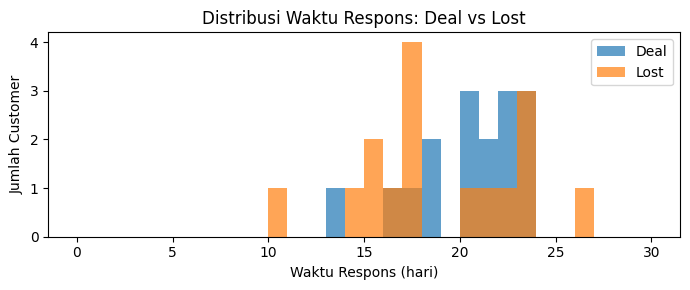

Insight: Customer yang deal cenderung mendapat respons lebih lambat.


In [63]:
# Hitung waktu respons sales dari prospek masuk ke follow-up pertama
resp_list = []
for cust, group in df.groupby('ID_Customer'):
    group = group.sort_values('Tanggal')
    if group['Kunjungan_Ke'].max() > 1:
        t_awal = group[group['Kunjungan_Ke'] == 1]['Tanggal'].min()
        t_fu1 = group[group['Kunjungan_Ke'] == 2]['Tanggal'].min()
        if pd.notnull(t_awal) and pd.notnull(t_fu1):
            delta = (pd.to_datetime(t_fu1) - pd.to_datetime(t_awal)).days
            status = group['Status_Kontrak'].iloc[-1]
            resp_list.append({'ID_Customer': cust, 'Waktu_Respons': delta, 'Status_Kontrak': status})
resp_df = pd.DataFrame(resp_list)

# Rata-rata waktu respons deal vs lost
mean_resp_deal = resp_df[resp_df['Status_Kontrak'].str.lower() == 'deal']['Waktu_Respons'].mean()
mean_resp_lost = resp_df[resp_df['Status_Kontrak'].str.lower() != 'deal']['Waktu_Respons'].mean()
print(f'Rata-rata waktu respons (hari) sebelum DEAL: {mean_resp_deal:.2f}')
print(f'Rata-rata waktu respons (hari) sebelum LOST: {mean_resp_lost:.2f}')

# Visualisasi
plt.figure(figsize=(7,3))
plt.hist(resp_df[resp_df['Status_Kontrak'].str.lower() == 'deal']['Waktu_Respons'], bins=range(0,31), alpha=0.7, label='Deal')
plt.hist(resp_df[resp_df['Status_Kontrak'].str.lower() != 'deal']['Waktu_Respons'], bins=range(0,31), alpha=0.7, label='Lost')
plt.xlabel('Waktu Respons (hari)')
plt.ylabel('Jumlah Customer')
plt.title('Distribusi Waktu Respons: Deal vs Lost')
plt.legend()
plt.tight_layout()
plt.show()

# Insight
if mean_resp_deal < mean_resp_lost:
    print('Insight: Customer yang deal cenderung mendapat respons lebih cepat.')
else:
    print('Insight: Customer yang deal cenderung mendapat respons lebih lambat.')

## 3. Analisis Pipeline Value

Estimasi nilai kontrak potensial di setiap tahap pipeline dan forecast revenue berdasarkan pipeline saat ini.

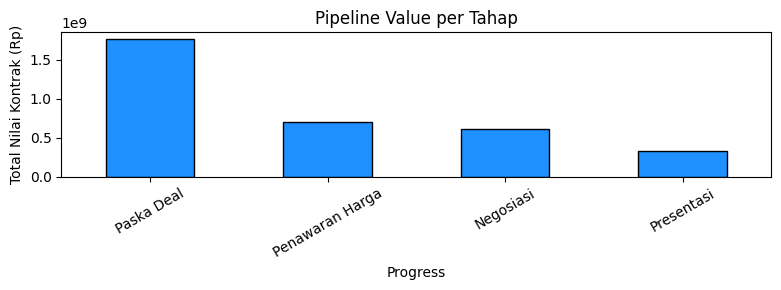

Total nilai deal saat ini: Rp 1,640,000,000
Forecast revenue (deal + probabilitas non-deal): Rp 1,715,019,162
Insight: Pipeline value terbesar ada di tahap: Paska Deal


In [64]:
# Ambil progress terakhir tiap customer
last_progress = df.sort_values('Tanggal').groupby('ID_Customer').last().reset_index()

# Estimasi pipeline value per tahap
pipeline_value = last_progress.groupby('Progress')['Nilai_Kontrak'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,3))
pipeline_value.plot(kind='bar', color='dodgerblue', edgecolor='black')
plt.ylabel('Total Nilai Kontrak (Rp)')
plt.title('Pipeline Value per Tahap')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# Forecast revenue: total deal + probabilitas deal x nilai kontrak untuk non-deal
if 'Prob_Deal' in last_progress.columns:
    forecast = last_progress.copy()
else:
    # Gunakan prediksi dari model logreg sebelumnya
    forecast = latest.copy()

deal_value = forecast[forecast['Status_Kontrak'].str.lower() == 'deal']['Nilai_Kontrak'].sum()
prob_value = (forecast[forecast['Status_Kontrak'].str.lower() != 'deal']['Prob_Deal'] * forecast[forecast['Status_Kontrak'].str.lower() != 'deal']['Nilai_Kontrak']).sum()
total_forecast = deal_value + prob_value
print(f"Total nilai deal saat ini: Rp {deal_value:,.0f}")
print(f"Forecast revenue (deal + probabilitas non-deal): Rp {total_forecast:,.0f}")

# Insight
print('Insight: Pipeline value terbesar ada di tahap:', pipeline_value.idxmax())

## 4. Analisis Lost Reason

Analisis alasan utama prospek gagal menjadi deal, divisualisasikan dengan wordcloud/bar chart.

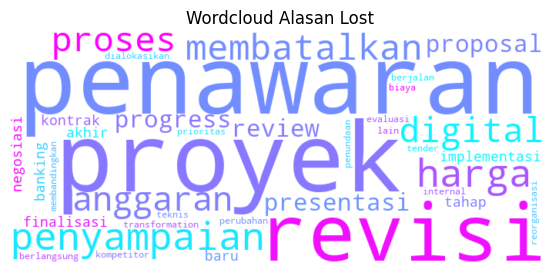

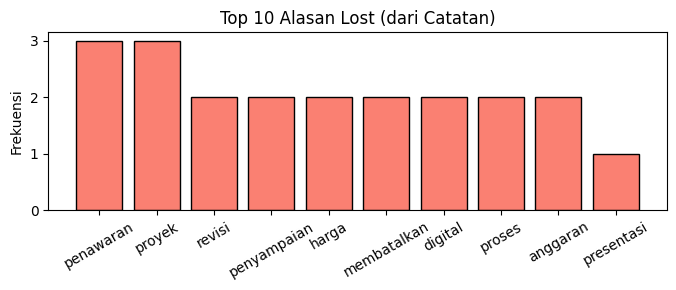

Insight: Alasan lost paling dominan: penawaran


In [67]:
# Analisis alasan lost (jika ada kolom alasan/catatan)
from wordcloud import WordCloud
from collections import Counter
import re

if 'Catatan' in last_progress.columns:
    lost_notes = last_progress[last_progress['Status_Kontrak'].str.lower() != 'deal']['Catatan'].dropna().astype(str)
    text = ' '.join(lost_notes)
    words = re.findall(r'\b\w+\b', text.lower())
    stopwords = set([
        'yang','dan','dalam','untuk','dengan','pada','di','ke','dari','sebagai','ada','ini','itu',
        'karena','sudah','belum','tidak','jadi','akan','oleh','atau','masih','saja','hanya','sangat','lebih','kurang', 'klien'
    ])
    filtered = [w for w in words if w not in stopwords and len(w) > 2]
    freq = Counter(filtered)
    # Wordcloud
    wc = WordCloud(width=700, height=300, background_color='white', colormap='cool').generate_from_frequencies(freq)
    plt.figure(figsize=(8,3))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title('Wordcloud Alasan Lost')
    plt.show()
    # Bar chart top 10
    top10 = freq.most_common(10)
    if top10:
        plt.figure(figsize=(7,3))
        plt.bar([x[0] for x in top10], [x[1] for x in top10], color='salmon', edgecolor='black')
        plt.ylabel('Frekuensi')
        plt.title('Top 10 Alasan Lost (dari Catatan)')
        plt.xticks(rotation=30)
        plt.tight_layout()
        plt.show()
        print('Insight: Alasan lost paling dominan:', top10[0][0])
    else:
        print('Tidak ada alasan lost yang cukup dominan.')
else:
    print('Kolom alasan/catatan tidak tersedia di dataset.')

## 5. Perbandingan Sales Baru vs Senior

Analisis efektivitas sales baru vs senior berdasarkan level/masa kerja, untuk melihat apakah sales senior lebih efektif.

C:\Users\SITI NURAFIFA(RIMA)\AppData\Local\Temp\ipykernel_26292\2061998273.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  conv_by_level = df.groupby('Level_Sales').apply(lambda x: (x['Status_Kontrak'].str.lower() == 'deal').mean()).sort_values(ascending=False)
C:\Users\SITI NURAFIFA(RIMA)\AppData\Local\Temp\ipykernel_26292\2061998273.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  target_by_level =

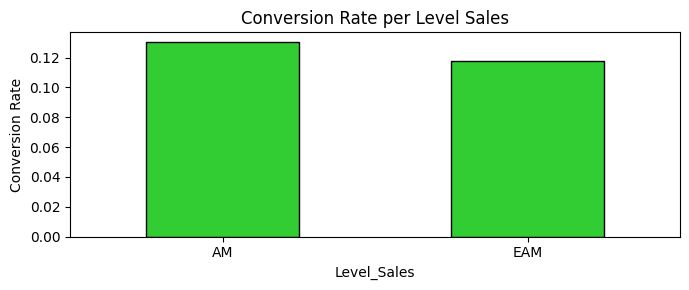

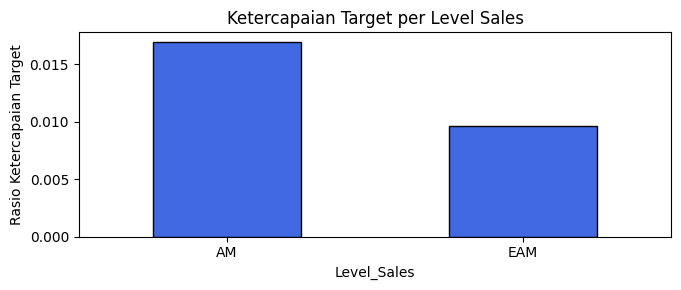

Insight: Level sales dengan conversion rate tertinggi: AM
Insight: Level sales dengan ketercapaian target tertinggi: AM


In [66]:
# Perbandingan sales baru vs senior berdasarkan Level_Sales
if 'Level_Sales' in df.columns:
    conv_by_level = df.groupby('Level_Sales').apply(lambda x: (x['Status_Kontrak'].str.lower() == 'deal').mean()).sort_values(ascending=False)
    target_by_level = df.groupby('Level_Sales').apply(lambda x: (x[x['Status_Kontrak'].str.lower() == 'deal']['Nilai_Kontrak'].sum() / x['Target_Sales'].sum()) if x['Target_Sales'].sum() > 0 else 0)
    plt.figure(figsize=(7,3))
    conv_by_level.plot(kind='bar', color='limegreen', edgecolor='black')
    plt.ylabel('Conversion Rate')
    plt.title('Conversion Rate per Level Sales')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
    plt.figure(figsize=(7,3))
    target_by_level.plot(kind='bar', color='royalblue', edgecolor='black')
    plt.ylabel('Rasio Ketercapaian Target')
    plt.title('Ketercapaian Target per Level Sales')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
    print('Insight: Level sales dengan conversion rate tertinggi:', conv_by_level.idxmax())
    print('Insight: Level sales dengan ketercapaian target tertinggi:', target_by_level.idxmax())
else:
    print('Kolom Level_Sales tidak tersedia di dataset.')